# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/Users/rvg/miniconda2/envs/tutorial/lib/python2.7/site-packages/pandas/core/indexing.py:426: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


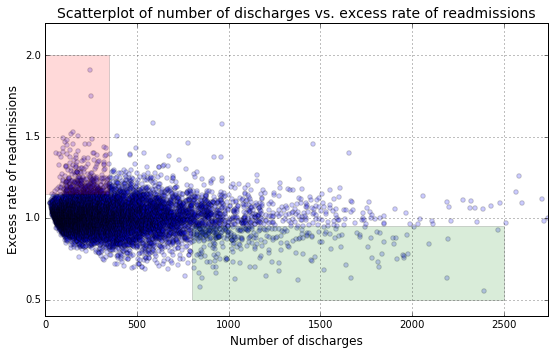

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# Part A:

#### I agree with the general empirical observations/statistics above, the conclusions are unfounded. Assuming there is a "significant" correlation between hospital capacity (number of discharges) and readmission rates by only looking at the scatter plots and a few superficial statistics is wrong. A more thorough analysis should be done.

# Part B:

In [37]:
''' Now we'll set up an appropriate hypothesis test. The null hypothesis is that there is no correlation between number of discharges and readmission rates, and the alternate hypothesis is that there is a correlation. We will test this using bootstrap statistics and the Pearson correlation coefficient. We will permute the x-values while leaving the y-values the same and recompute the Pearson correlation coefficient 100,000 times and then find the fraction of times we simulate a Pearson correlation coefficient as extreme as the one observed.'''

def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x,y)   
    
    return corr_mat[0,1]

# y-variable
readmission_nan = np.array(clean_hospital_read_df['Excess Readmission Ratio'])
# remove the small nan's (81/11578, ~.7%) from both dfs
readmission = readmission_nan[~np.isnan(readmission_nan)]

# x-variable
discharges = np.array(clean_hospital_read_df['Number of Discharges'])[~np.isnan(readmission_nan)]

# Compute observed correlation: r_obs
r_obs = pearson_r(discharges, readmission)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(100000)

# Draw replicates
for i in range(100000):
    # Permute illiteracy measurments: illiteracy_permuted
    discharges_permuted = np.random.permutation(discharges)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(discharges_permuted, readmission)

# Compute p-value: p
p = np.sum(perm_replicates <= r_obs) / float(len(perm_replicates))
print 'p-value = %.6f' % p

p-value = 0.286240


### B.3
#### Our p-value is 0.286, which is higher than our alpha of .01, indicating that we CANNOT reject the null hypothesis, and that there is no significant correlation between readmission and discharges, as was assumed in the previous, faulty analysis.

### B.4
#### Statistical significance is not very convincing, but for practical significance, it still might not be a bad for hospitals with small capacity to consider upgrading. My recommendation to the client now would be to consider upgrading small hospitals (and show them the low end of the scatter plot), but to be aware that the correlation between the two variables is not statistically significant and so that they should consider upgrades carefully.

### B.5
#### The advantages to using the above plot is that one can see the negative trend between the two variables and detect outliers with ease. The disadvantage is that there are too many data points and you cannot get a sense of the density of the points from this scatter plot alone.

/Users/rvg/miniconda2/envs/tutorial/lib/python2.7/site-packages/matplotlib/__init__.py:892: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


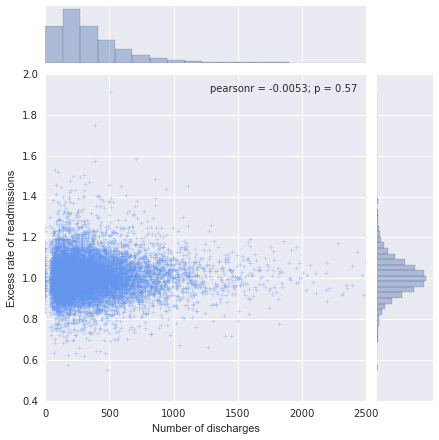

In [62]:
# let's use a seaborn jointplotto better visualize the density of points, their distributions, and trends
import seaborn as sns
g = sns.jointplot(x=discharges, y=readmission, xlim=(0,2500))
g.plot_joint(plt.scatter, s=10, linewidth=1, marker="+", alpha=.3, c='cornflowerblue')
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("Number of discharges", "Excess rate of readmissions");